In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

2024-06-09 18:48:05.957626: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
# Combine train and test sets
all_images = np.concatenate((train_images, test_images), axis=0)
all_labels = np.concatenate((train_labels, test_labels), axis=0)

# Shuffle the combined dataset
indices = np.arange(len(all_images))
np.random.shuffle(indices)
all_images = all_images[indices]
all_labels = all_labels[indices]

In [4]:
# Calculate the number of samples for each split
num_total = len(all_images)
num_train = int(0.6 * num_total)
num_val = int(0.2 * num_total)
num_test = num_total - num_train - num_val

# Split the data
train_images = all_images[:num_train]
train_labels = all_labels[:num_train]
val_images = all_images[num_train:num_train + num_val]
val_labels = all_labels[num_train:num_train + num_val]
test_images = all_images[num_train + num_val:]
test_labels = all_labels[num_train + num_val:]

print("Training data shape:", train_images.shape)
print("Validation data shape:", val_images.shape)
print("Test data shape:", test_images.shape)

Training data shape: (36000, 32, 32, 3)
Validation data shape: (12000, 32, 32, 3)
Test data shape: (12000, 32, 32, 3)


In [14]:
# Define the feedforward neural network model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(32, activation='leaky_relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation='leaky_relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(val_images, val_labels))

Epoch 1/50
1125/1125 [==============================] - 4s 3ms/step - loss: 2.0740 - accuracy: 0.2357 - val_loss: 1.9055 - val_accuracy: 0.3128
Epoch 2/50
1125/1125 [==============================] - 3s 3ms/step - loss: 1.9256 - accuracy: 0.2986 - val_loss: 1.8062 - val_accuracy: 0.3565
Epoch 3/50
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8563 - accuracy: 0.3291 - val_loss: 1.8215 - val_accuracy: 0.3523
Epoch 4/50
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8134 - accuracy: 0.3477 - val_loss: 1.7465 - val_accuracy: 0.3793
Epoch 5/50
1125/1125 [==============================] - 2s 2ms/step - loss: 1.7809 - accuracy: 0.3587 - val_loss: 1.7132 - val_accuracy: 0.3923
Epoch 6/50
1125/1125 [==============================] - 2s 2ms/step - loss: 1.7556 - accuracy: 0.3667 - val_loss: 1.6592 - val_accuracy: 0.4185
Epoch 7/50
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7338 - accuracy: 0.3804 - val_loss: 1.6426 - val_accuracy:

In [17]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_labels.flatten()

375/375 [==============================] - 1s 1ms/step


In [18]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

# Calculate F1 Score
f1 = f1_score(true_labels, predicted_labels, average='weighted')
print(f'F1 Score: {f1:.3f}')

375/375 [==============================] - 0s 987us/step - loss: 1.5191 - accuracy: 0.4651
Test accuracy: 0.4650833308696747
F1 Score: 0.458


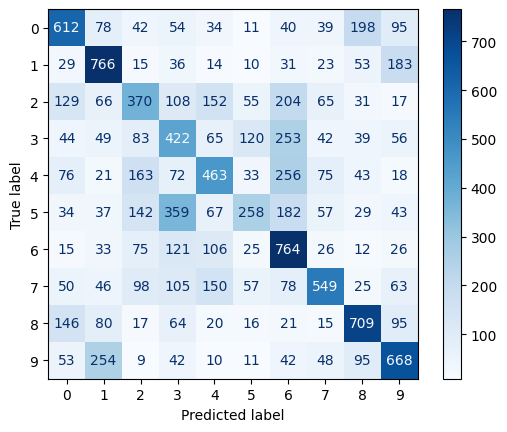

In [19]:
# Compute and display the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

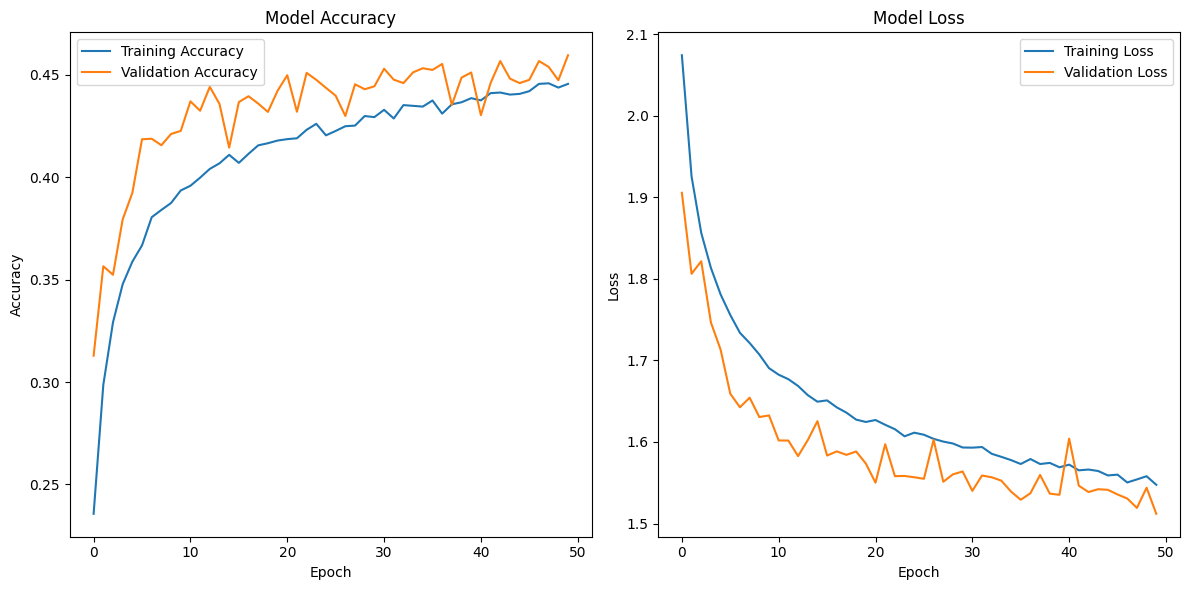

In [20]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.tight_layout()
plt.show()